<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [1]:
import pandas as pd

Load the dataset into a dataframe.


In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


<AxesSubplot:ylabel='Density'>

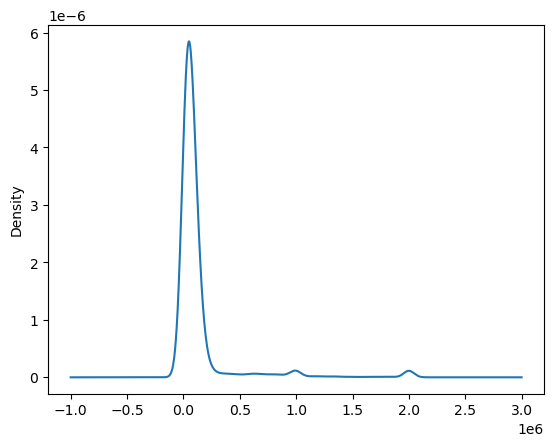

In [3]:
# your code goes here
df['ConvertedComp'].plot(kind = 'kde')

Plot the histogram for the column `ConvertedComp`.


<AxesSubplot:ylabel='Frequency'>

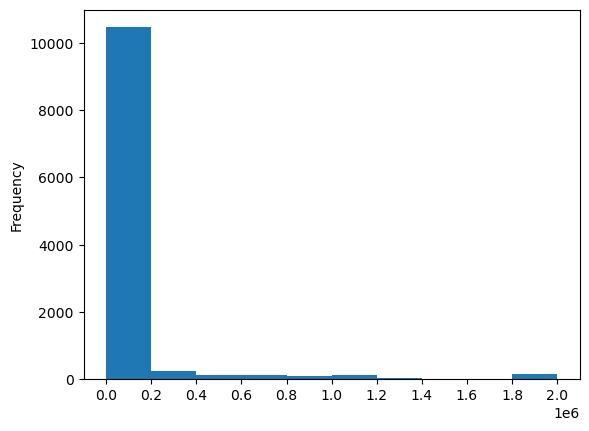

In [4]:
# your code goes here
import numpy as np
ConvertedComp_sorted_data = df['ConvertedComp'].replace(np.nan, (df['ConvertedComp'].median()))

count, bin_edges = np.histogram(ConvertedComp_sorted_data)

ConvertedComp_sorted_data.plot( kind= 'hist', xticks = bin_edges)

What is the median of the column `ConvertedComp`?


In [5]:
# your code goes here
median_ConvertedComp = df.ConvertedComp.median()

print('The median of the column ConvertedComp: ',median_ConvertedComp)

The median of the column ConvertedComp:  57745.0


How many responders identified themselves only as a **Man**?


In [6]:
# your code goes here
gender = df['Gender'].value_counts().to_frame()
gender = gender.transpose()
gender_Man = gender.Man.to_list()

print('Number of responders who identify themselves only as a Man: ', gender_Man)

Number of responders who identify themselves only as a Man:  [10480]


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [7]:
# your code goes here
#get the section of data required
df_group = df[['Gender','ConvertedComp']]

#group data by 'Gender'
category_test = df_group.groupby(['Gender'], as_index = False).median()
category_test = category_test.set_index('Gender')

#import numpy 
import numpy as np

median_woman = category_test.loc['Woman'].to_list()

print('The median ConvertedComp of responders who identified themselves only as a Woman: ', median_woman)

The median ConvertedComp of responders who identified themselves only as a Woman:  [57708.0]


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [8]:
# your code goes here
df.Age.describe()

count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64

In [9]:
df.Age.median()

29.0

Plot a histogram of the column `Age`.


<AxesSubplot:ylabel='Frequency'>

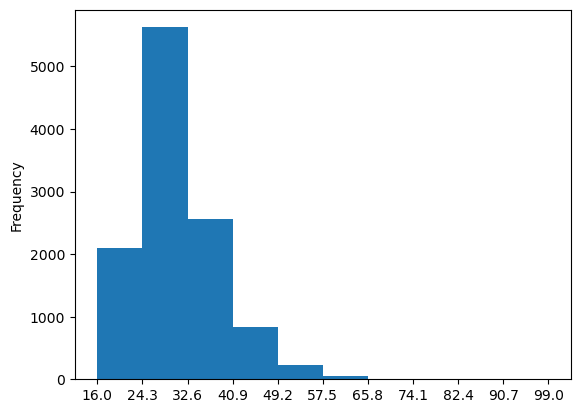

In [10]:
# your code goes here
age_sorted_data = df['Age'].replace(np.nan, (df['Age'].mean()))

count, bin_edges = np.histogram(age_sorted_data)

age_sorted_data.plot( kind= 'hist', xticks = bin_edges)

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?



From the graph below we see that outliers exit from just above the 200,000 point to the 2,000,000


<AxesSubplot:>

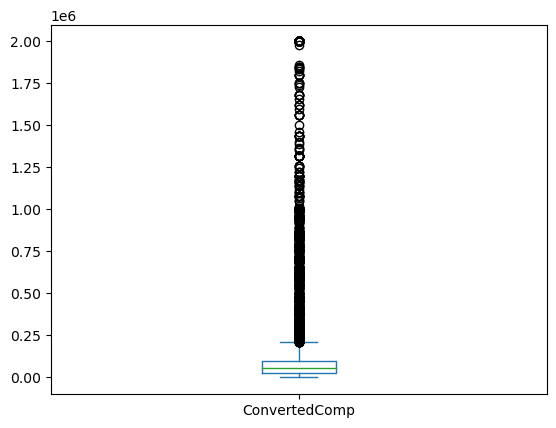

In [11]:
# your code goes here
print('')
print('From the graph below we see that outliers exit from just above the 200,000 point to the 2,000,000')
df['ConvertedComp'].plot(kind='box')

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [12]:
# your code goes here
import numpy as np
data = df['ConvertedComp']

q1 = data.quantile(0.25)
q3 = data.quantile(0.75)

iqr = q3 - q1

print('The first quartile: ', q1)
print('The third quartile: ', q3)
print('The interquartile range: q3 - q1 = ', iqr)

The first quartile:  26868.0
The third quartile:  100000.0
The interquartile range: q3 - q1 =  73132.0


Find out the upper and lower bounds.


In [13]:
# your code goes here
data = df['ConvertedComp']
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)

iqr = q3 - q1

upper_bound =  (q3 + 1.5 * iqr)
lower_bound =  (q1 - 1.5 * iqr)

print('The upper and lower bounds are: {}, {} respectively'.format(upper_bound, lower_bound))


The upper and lower bounds are: 209698.0, -82830.0 respectively


Identify how many outliers are there in the `ConvertedComp` column.


In [14]:
# your code goes here
data = df['ConvertedComp']
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)

iqr = q3 - q1

upper_bound =  (q3 + 1.5 * iqr)
lower_bound =  (q1 - 1.5 * iqr)


data_outliers = data[ (df['ConvertedComp'] < lower_bound) | (df['ConvertedComp'] > upper_bound)]

number_data_outliers = len(data_outliers)

print('Number of outliers in the data: ',number_data_outliers)

Number of outliers in the data:  879


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [15]:
# your code goes here
data = df['ConvertedComp']
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)

iqr = q3 - q1

upper_bound =  (q3 + 1.5 * iqr)
lower_bound =  (q1 - 1.5 * iqr)

#remove the outliers
ConvertedComp_sorted =  df[(df['ConvertedComp'] > lower_bound) & (df['ConvertedComp'] < upper_bound)]

ConvertedComp_sorted

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,NaN,23.0,Man,No,Bisexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
2,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Somewhat more welcome now than last year,Tech articles written by other developers;Cour...,28.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Easy
4,17,I am a developer by profession,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,Australia,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,29.0,Man,No,Straight / Heterosexual,Hispanic or Latino/Latina;Multiracial,No,Appropriate in length,Easy
5,19,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Brazil,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,31.0,Man,No,Straight / Heterosexual,Hispanic or Latino/Latina,Yes,Too long,Easy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11392,25134,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Ecuador,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Somewhat less welcome now than last year,Tech articles written by other developers,32.0,Man,No,Straight / Heterosexual,Hispanic or Latino/Latina,No,Appropriate in length,Easy
11393,25136,I am a developer by profession,Yes,Never,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Cour...,36.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Difficult
11394,25137,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Poland,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,A lot more welcome now than last year,Tech articles written by other developers;Tech...,25.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
11395,25138,I am a developer by profession,Yes,Less than once per year,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer

In [16]:
#Calculate the new median after removing outliers
ConvertedComp_sorted['ConvertedComp'].median()

52704.0

In [17]:
ConvertedComp_sorted['ConvertedComp'].mean()

59883.20838915799

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [18]:
print(df.dtypes)

Respondent       int64
MainBranch      object
Hobbyist        object
OpenSourcer     object
OpenSource      object
                 ...  
Sexuality       object
Ethnicity       object
Dependents      object
SurveyLength    object
SurveyEase      object
Length: 85, dtype: object


In [19]:
# your code goes here
columns = df.columns

for column in columns:
    if (df[column].dtype == 'float64') | (df[column].dtype == 'int64'):
        print('Correlation between Age and {}:'.format(column))
        print(df[[column, 'Age']].corr())
        print('')

Correlation between Age and Respondent:
            Respondent       Age
Respondent    1.000000  0.004041
Age           0.004041  1.000000

Correlation between Age and CompTotal:
           CompTotal      Age
CompTotal    1.00000  0.00697
Age          0.00697  1.00000

Correlation between Age and ConvertedComp:
               ConvertedComp       Age
ConvertedComp       1.000000  0.105386
Age                 0.105386  1.000000

Correlation between Age and WorkWeekHrs:
             WorkWeekHrs       Age
WorkWeekHrs     1.000000  0.036518
Age             0.036518  1.000000

Correlation between Age and CodeRevHrs:
            CodeRevHrs       Age
CodeRevHrs    1.000000 -0.020469
Age          -0.020469  1.000000

Correlation between Age and Age:
     Age  Age
Age  1.0  1.0
Age  1.0  1.0



## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
